Imported necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

Loading the dataset

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
X = df.drop('target', axis = 1)
y = df['target']

Scaling the dataset

In [5]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Splitting the dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Making the predictions

In [8]:
y_pred = model.predict(X_test)

Checking the accuracy

In [9]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy of the model is {accuracy *100:.2f}%")

Accuracy of the model is 72.71%


In [10]:
mse = mean_squared_error(y_test, y_pred)
print(f"The Mean Squared Error of the model is {mse * 100:.2f} %")

The Mean Squared Error of the model is 6.41 %


In [11]:
r2 = r2_score(y_test, y_pred)
print(f"The R2 Score of the model is {r2 * 100:.2f}%")

The R2 Score of the model is 72.71%


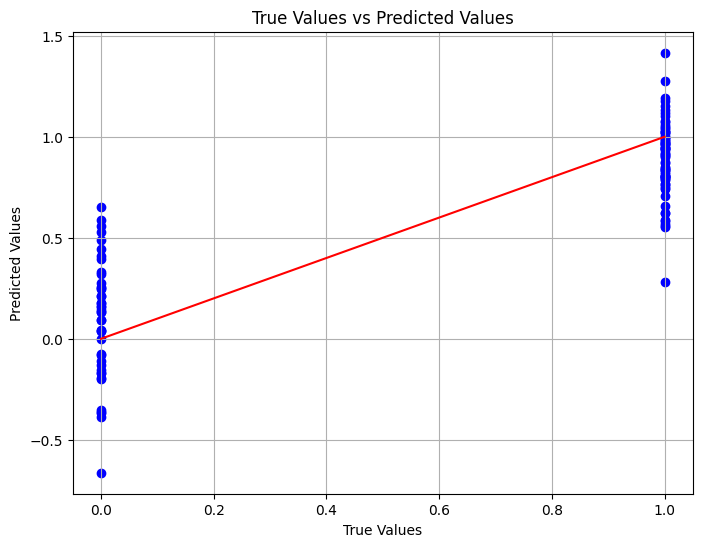

In [14]:
plt.figure(figsize = (8,6))
plt.scatter(y_test, y_pred, color = 'blue', label = 'Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', label = 'Perfect fit')
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

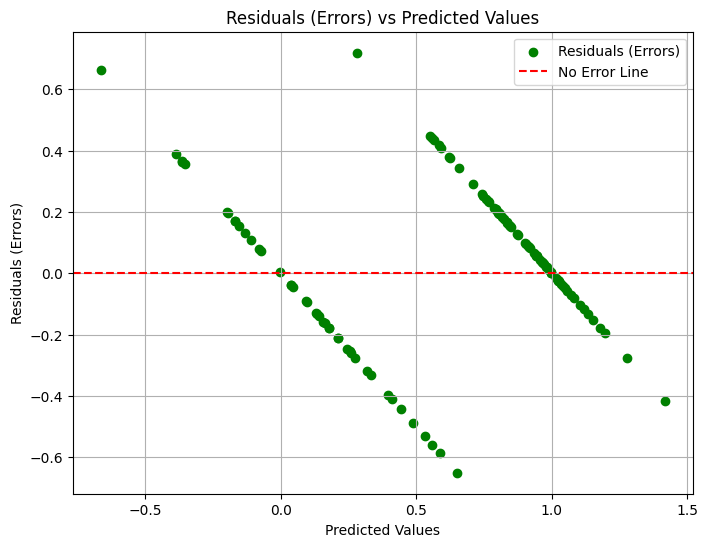

In [15]:
# Calculate the residuals (errors)
residuals = y_test - y_pred

# Scatter plot of residuals (errors)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', label='Residuals (Errors)')
plt.axhline(0, color='red', linestyle='--', label='No Error Line')
plt.title('Residuals (Errors) vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.legend()
plt.grid(True)
plt.show()